In [1]:
# 라이브러리 
import pandas as pd

In [2]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [5]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

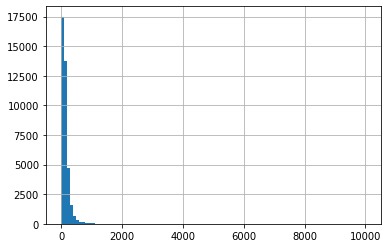

In [8]:
# target(hist)
train['price'].hist(bins=100)

In [9]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [11]:
# 결측치 컬럼 삭제(last_review)
column_to_remove = ['last_review']
train = train.drop(column_to_remove, axis = 1)
test = test.drop(column_to_remove, axis = 1)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [12]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
train['name'] = train['name'].fillna('no_name')
test['name'] = test['name'].fillna('no_name')
train['host_name'] = train['host_name'].fillna('no_host_name')
test['host_name'] = test['host_name'].fillna('no_host_name')
train.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
# 결측치 확인
# [[YOUR CODE]]
test.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
# 가격 값 복사
# [[YOUR CODE]]
train_price_copy = train['price'].copy()
train_copy = train.copy()

In [15]:
# 수치형 피처 선택
# [[YOUR CODE]]
# train_copy = train_copy.drop(['id', 'name', 'host_id', 'host_name'], axis = 1)
# 위를 통해 범주형 데이터 라벨인코더 처리전 필요없어 보이는 범주 컬럼 삭제

cols = train_copy.select_dtypes(include = 'object').columns
from sklearn.preprocessing import LabelEncoder
for col in cols:
    le = LabelEncoder()
    train_copy[col] = le.fit_transform(train_copy[col])

train_copy

cols_test = test.select_dtypes(include = 'object').columns
for col_t in cols_test:
    le = LabelEncoder()
    test[col_t] = le.fit_transform(test[col_t])

In [16]:
# 검증 데이터 분리
# [[YOUR CODE]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_copy.drop('price', axis= 1), train['price'], test_size = 0.2, random_state = 2023
)


In [18]:
# 머신러닝(회귀)
# [[YOUR CODE]]
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# 모델 선택
model = LinearRegression()
# 학습
model.fit(X_train,y_train)
# 예측
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

87756.18786986152

In [19]:
# 릿지 회귀
# [[YOUR CODE]]
from sklearn.linear_model import Ridge
# 모델 선택
model = Ridge(alpha = 1)
# 학습
model.fit(X_train, y_train)
# 예측
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.64416e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


87761.77770113778

In [20]:
# 라쏘 회귀
# [[YOUR CODE]]
from sklearn.linear_model import Lasso
# 모델 선택
model = Lasso(alpha = 1)
# 학습
model.fit(X_train, y_train)
# 예측
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

88669.54038325936

In [21]:
# 엘라스틱넷 회귀
# [[YOUR CODE]]
from sklearn.linear_model import ElasticNet
# 모델 선택
model = ElasticNet(alpha = 1)
# 학습
model.fit(X_train, y_train)
# 예측
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

90726.76454917116

In [22]:
# 랜덤포레스트
# [[YOUR CODE]]
from sklearn.ensemble import RandomForestRegressor
# 모델 선택
model = RandomForestRegressor()
# 학습
model.fit(X_train, y_train)
# 예측
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

86041.91934196063

In [23]:
# Xgboost
# [[YOUR CODE]]
from xgboost import XGBRegressor
# 모델 선택
model = XGBRegressor()
# 학습
model.fit(X_train, y_train)
# 예측
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


98360.35822682038

In [24]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')


#예측
pred = model.predict(test)
mean_squared_error(y_test, pred)

45677.65440286328

In [25]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요! 
print(f"나의 점수는 {mean_squared_error(y_test, pred)} 입니다.")

나의 점수는 45677.65440286328 입니다.


In [27]:
# Baseline을 실행하면서 범주형 데이터를 인코딩 하는 과정에서 영상은 트레인 셋만 진행하였지만,
# 테스트 셋도 진행하여 바로 51xxx 이하로 나오게 됨